In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Télécharger les stopwords et lemmatisation
download('stopwords')
download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Charger le fichier CSV contenant les critiques IMDb
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
# Affichage des premières lignes du dataset pour vérifier la structure
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
# Fonction de prétraitement du texte : Nettoyage et lemmatisation des critiques
def clean_text(text):
    text = text.lower()  # Mise en minuscule
    text = re.sub(r'\W+', ' ', text)  # Supprimer les caractères non alphabétiques
    words = simple_preprocess(text)  # Tokenisation du texte
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation
    return words

In [6]:
# Appliquer le nettoyage aux critiques
sentences = df['review'].apply(clean_text).tolist()

In [7]:
# Entraînement du modèle Word2Vec
word2vec_model = gensim.models.Word2Vec(
    sentences,
    vector_size=100,  # Taille des vecteurs de mots
    window=5,  # Fenêtre de contexte
    min_count=5,  # Ignorer les mots rares
    workers=4,  # Nombre de threads
    sg=1  # Utilisation du modèle Skip-gram
)

In [8]:
# Sauvegarde du modèle entraîné
word2vec_model.save("word2vec_imdb_model.model")

In [9]:
# Affichage des mots les plus proches du mot "movie"
similar_words = word2vec_model.wv.most_similar("movie", topn=10)

In [10]:
# Affichage des résultats
df_results = pd.DataFrame(similar_words, columns=["Mot", "Similarité"])
print(df_results)


            Mot  Similarité
0          film    0.895234
1        havent    0.829883
2        sequal    0.817729
3   strangeland    0.814683
4       atleast    0.812268
5     demonicus    0.807854
6         noroi    0.806974
7       loooong    0.800129
8       lenient    0.797155
9  dissapointed    0.796722


In [11]:
# Visualisation des mots similaires en 2D avec t-SNE
# Extraire les vecteurs de mots
words = [word for word, _ in similar_words]
vectors = [word2vec_model.wv[word] for word in words]

In [12]:
# Conversion en tableau NumPy
vectors = np.array(vectors)

In [13]:
# Réduction de la dimensionnalité avec t-SNE (réduire la perplexité)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Ajuster la perplexité à 5
reduced_vectors = tsne.fit_transform(vectors)


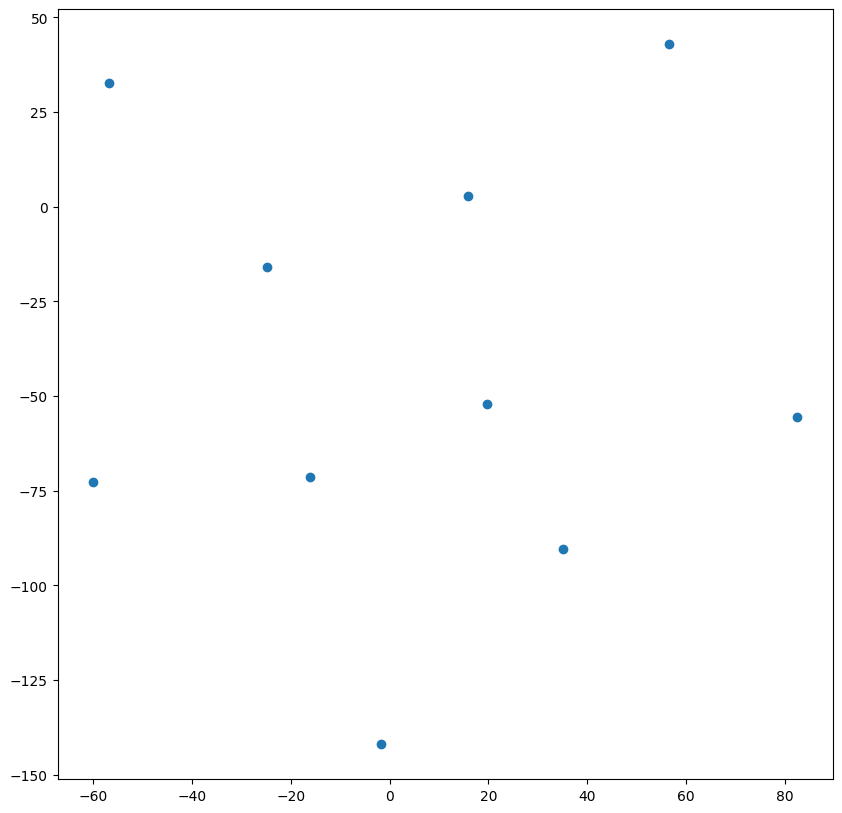

In [14]:
# Visualisation
plt.figure(figsize=(10, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

In [17]:
# Tester les analogies de mots : "king" - "man" + "woman" = "queen"
analogy_result = word2vec_model.wv.most_similar(positive=["woman", "king"], negative=["man"], topn=1)
print(f"Résultat de l'analogie 'king' - 'man' + 'woman' : {analogy_result}")

Résultat de l'analogie 'king' - 'man' + 'woman' : [('viii', 0.5400246381759644)]
